# Tugas 4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/data_berita_detik.csv")
df.head()

,judul,tanggal,isi,kategori
0,"Gaduh Poster 'Berobat ke Malaysia Aja', Kemenk...","Kamis, 10 Okt 2024 10:06 WIB",Jakarta - Kementerian Kesehatan RI (Kemenkes) ...,Kesehatan
1,Viral Poster 'Berobat ke Malaysia Aja' Dekat K...,"Kamis, 10 Okt 2024 09:42 WIB",Jakarta - Baru-baru ini publik dihebohkan deng...,Kesehatan
2,"Waspadai Gejala Kanker Paru, Dokter Ungkap Bis...","Kamis, 10 Okt 2024 09:33 WIB",Jakarta - Kanker paru terjadi akibat pembelaha...,Kesehatan
3,Kondisi Terkini Raja Salman usai Jalani Perawa...,"Kamis, 10 Okt 2024 09:01 WIB","Jakarta - Raja Arab Saudi, Salman bin Abdulazi...",Kesehatan
4,Cerita Dokter Temukan Anak Alami Anemia gegara...,"Kamis, 10 Okt 2024 08:31 WIB",Jakarta - Viral sebuah template Instagram stor...,Kesehatan


In [3]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[1]
print(sample_berita)


Jakarta - Baru-baru ini publik dihebohkan dengan unggahan tentang poster yang terpampang di Kedutaan Besar Malaysia. Poster tersebut berisikan ajakan kepada masyarakat Indonesia untuk berobat ke Rumah Sakit di Malaysia. Hal tersebut karena harga berobat yang jauh lebih terjangkau. "Mau berobat? Ke Malaysia aja! Lebih dekat, lebih terjangkau" bunyi promosi di poster itu. Pantauan detikcom, poster tersebut terpajang tak jauh dari kantor Kementerian Kesehatan RI, di Jl HR Rasuna Said, Jakarta Selatan. Hanya berjarak 650 meter atau kurang lebih 9 menit jika berjalan kaki. Adapun poster tersebut mendadak viral setelah salah satu pengguna media sosial X mengunggahnya. "Memang boleh segamblang itu," ujar pengguna X @shyxxxx Unggahan tersebut pun menuai pro-kontra di media sosial. Hal ini dikarenakan sebelumnya pemerintah Indonesia telah mendorong peningkatan pelayanan kesehatan di Indonesia agar masyarakat mau berobat di Indonesia. "Ril ada aku kemarin pas pulang ke indo dari malaysia nemu or

memisahkan per kalimat


---




In [4]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df


,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Baru-baru ini publik dihebohkan deng...
1,Kalimat ke 2,Poster tersebut berisikan ajakan kepada masyar...
2,Kalimat ke 3,Hal tersebut karena harga berobat yang jauh le...
3,Kalimat ke 4,"""Mau berobat? Ke Malaysia aja! Lebih dekat, le..."
4,Kalimat ke 5,"Pantauan detikcom, poster tersebut terpajang t..."
5,Kalimat ke 6,Hanya berjarak 650 meter atau kurang lebih 9 m...
6,Kalimat ke 7,Adapun poster tersebut mendadak viral setelah ...
7,Kalimat ke 8,"""Memang boleh segamblang itu,"" ujar pengguna X..."
8,Kalimat ke 9,Hal ini dikarenakan sebelumnya pemerintah Indo...
9,Kalimat ke 10,"""Ril ada aku kemarin pas pulang ke indo dari m..."


pre processing


---



In [5]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,kalimat ke n,final
0,Kalimat ke 1,jakarta barubaru publik heboh unggah poster pa...
1,Kalimat ke 2,poster risi aja masyarakat indonesia obat ruma...
2,Kalimat ke 3,harga obat jangkau
3,Kalimat ke 4,obat malaysia aja jangkau bunyi promosi poster
4,Kalimat ke 5,pantau detikcom poster pajang kantor menteri s...
5,Kalimat ke 6,jarak meter menit jalan kaki
6,Kalimat ke 7,poster dadak viral salah guna media sosial x u...
7,Kalimat ke 8,gamblang guna x shyxxxx unggah tuai prokontra ...
8,Kalimat ke 9,perintah indonesia dorong tingkat layan sehat ...
9,Kalimat ke 10,ril kemarin pas pulang indo malaysia nemu oran...


TF-IDF


---

menghitung skor **TF-IDF (Term Frequency-Inverse Document Frequency)** dari setiap kata dalam kalimat yang telah diproses untuk menilai seberapa penting kata-kata tersebut dalam konteks kalimat. Pertama, kalimat-kalimat digabung menjadi dokumen, kemudian TF-IDF diterapkan untuk menghasilkan matriks yang menunjukkan skor setiap kata dalam setiap kalimat. Nama-nama kata (fitur) diambil dan hasil TF-IDF ini diubah menjadi tabel agar lebih mudah dianalisis. Selanjutnya, ditambahkan kolom identifikasi untuk setiap kalimat, dan akhirnya tabel tersebut ditampilkan dengan menampilkan skor TF-IDF dari kata-kata di setiap kalimat.

In [7]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,aja,akses,akun,alas,arab,barubaru,biaya,bunyi,cepat,...,tugas,tuju,unggah,ungkap,uni,up,viral,warga,yaaaa,yhah
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.371499,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.294664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.354889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kalimat ke 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.410309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466782,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kalimat ke 6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.317132,0.000000,0.000000,0.000000,0.399826,0.000000,0.000000,0.000000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.304089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.000000,0.000000,0.305924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Menghitung kemiripan antar kalimat**


---


Kalimat-kalimat dalam kumpulan teks yang telah diubah menjadi angka menggunakan TF-IDF, dan kemudian dihitung cosine similarity-nya. Nilai cosine similarity ini menunjukkan seberapa mirip dua kalimat. Jika angkanya mendekati 1, berarti dua kalimat sangat mirip, sedangkan jika mendekati 0, berarti tidak mirip.

In [8]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,Kalimat ke 11,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14,Kalimat ke 15,Kalimat ke 16,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20
kalimat ke n,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.126583,0.000000,0.146351,0.128930,0.0,0.160562,0.089604,0.000000,0.089129,0.000000,0.000000,0.059290,0.000000,0.000000,0.000000,0.040149,0.000000,0.000000,0.0
Kalimat ke 2,0.126583,1.000000,0.098822,0.369456,0.051703,0.0,0.072938,0.000000,0.368018,0.139327,0.000000,0.216437,0.120931,0.000000,0.153054,0.000000,0.043632,0.000000,0.000000,0.0
Kalimat ke 3,0.000000,0.098822,1.000000,0.323327,0.000000,0.0,0.000000,0.000000,0.074277,0.074881,0.000000,0.081906,0.099624,0.000000,0.000000,0.000000,0.000000,0.000000,0.140419,0.0
Kalimat ke 4,0.146351,0.369456,0.323327,1.000000,0.059777,0.0,0.084328,0.000000,0.048699,0.161085,0.000000,0.053701,0.139815,0.000000,0.000000,0.000000,0.050446,0.000000,0.092066,0.0
Kalimat ke 5,0.128930,0.051703,0.000000,0.059777,1.000000,0.0,0.051202,0.000000,0.038861,0.000000,0.000000,0.042852,0.000000,0.000000,0.062831,0.000000,0.060356,0.023363,0.000000,0.0
Kalimat ke 6,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 7,0.160562,0.072938,0.000000,0.084328,0.051202,0.0,1.000000,0.429751,0.000000,0.000000,0.085630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 8,0.089604,0.000000,0.000000,0.000000,0.000000,0.0,0.429751,1.000000,0.000000,0.000000,0.082108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 9,0.000000,0.368018,0.074277,0.048699,0.038861,0.0,0.000000,0.000000,1.000000,0.031917,0.000000,0.464092,0.042463,0.000000,0.160939,0.000000,0.000000,0.164330,0.000000,0.0


**Membuat matriks adjacency berdasarkan nilai ambang batas**

---



membuat **matriks adjacency** berdasarkan nilai **cosine similarity** antar kalimat. Pertama, ambang batas (**threshold**) ditetapkan pada 0,5, yang berarti bahwa jika nilai cosine similarity antara dua kalimat sama dengan atau lebih besar dari 0,5, maka akan diberi nilai 1 (menunjukkan adanya keterkaitan antara kalimat); jika lebih kecil dari itu, diberi nilai 0 (tidak ada keterkaitan). Hasil ini disimpan dalam sebuah matriks adjacency, yang kemudian diubah menjadi **dataframe** untuk menampilkan hasilnya secara lebih jelas dengan baris dan kolom yang mewakili setiap kalimat.

In [20]:
# Tetapkan ambang batas (threshold) 0.5
threshold = 0.4

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,Kalimat ke 11,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14,Kalimat ke 15,Kalimat ke 16,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20
kalimat ke n,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


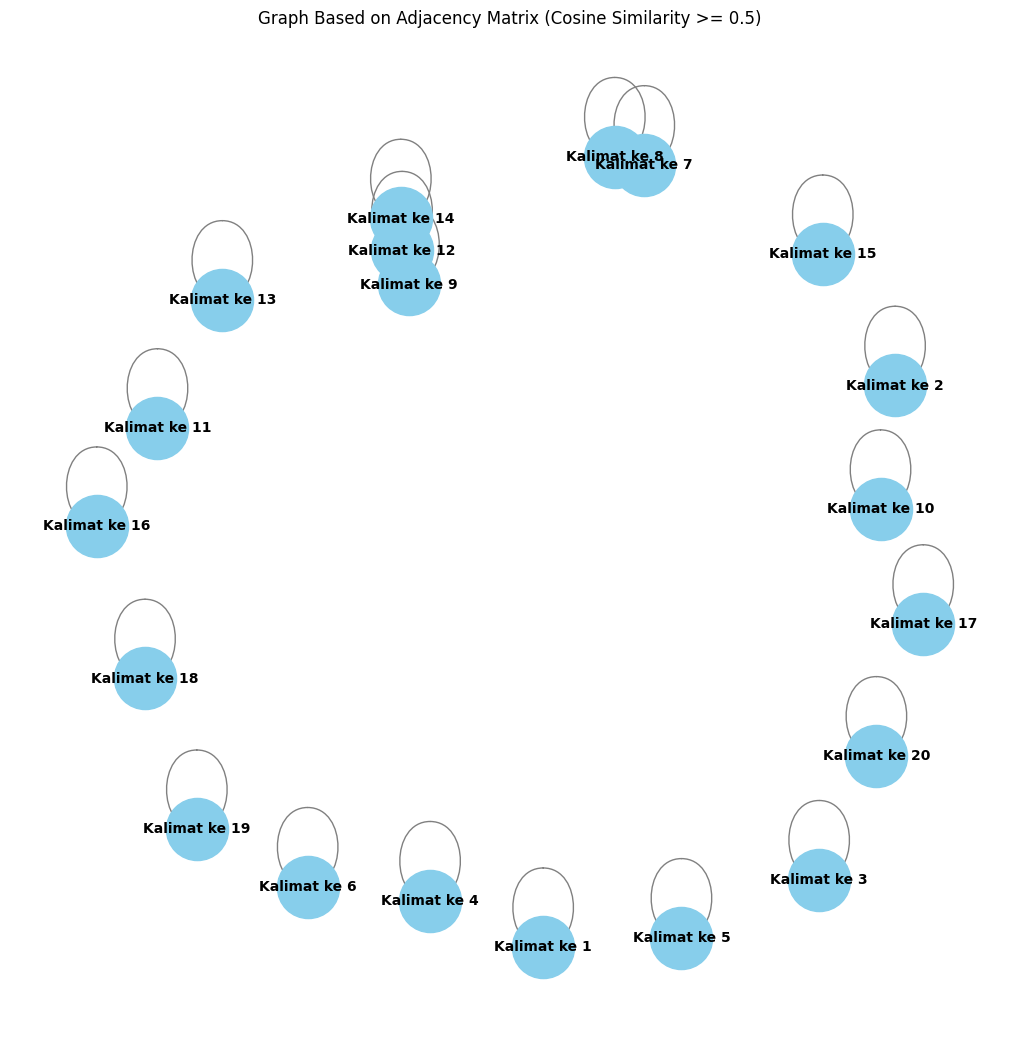

In [21]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.5)")
plt.show()

In [11]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.0,0.105263,0.0
1,Kalimat ke 2,0.0,0.105263,0.0
2,Kalimat ke 3,0.0,0.105263,0.0
3,Kalimat ke 4,0.0,0.105263,0.0
4,Kalimat ke 5,0.0,0.105263,0.0
5,Kalimat ke 6,0.0,0.105263,0.0
6,Kalimat ke 7,0.0,0.105263,0.0
7,Kalimat ke 8,0.0,0.105263,0.0
8,Kalimat ke 9,0.0,0.105263,0.0
9,Kalimat ke 10,0.0,0.105263,0.0
